In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

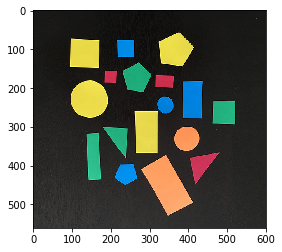

In [38]:
image = cv2.imread('shapes_and_colors.png') # Opencv BGR
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [39]:
# BGR limites
boundaries = [
	([17, 15, 100], [50, 56, 200]),
	([46, 31, 4], [220, 88, 50]),
	([25, 146, 190], [62, 174, 250]),
	([103, 86, 65], [145, 133, 128])
]
red_boundary = [([17, 15, 100], [50, 56, 200])]

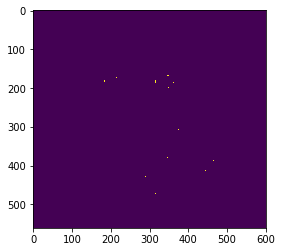

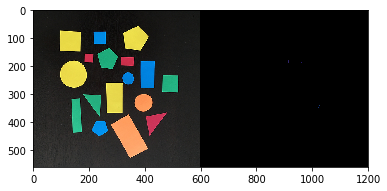

In [40]:
for (lower, upper) in red_boundary:
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask=mask)
    plt.imshow(mask)
    plt.show()
    plt.imshow(np.hstack([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), output]))
    #cv2.waitKey(0)
    plt.show()

# Shape detector

In [48]:
import cv2

class ShapeDetector:
    def __init__(self):
        pass
    
    def detect(self, c):
        shape = "unidentified"
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        
        if len(approx) == 3:
            shape = "Triangle"
        elif len(approx) == 4:
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)
            
            shape = "Square" if ar >= 0.95 and ar <= 1.05 else "Rectangle"
        
        elif len(approx) == 5:
            shape = "Pentagon"
            
        else:
            shape = "Circle"
            
        return shape

In [49]:
import imutils
import cv2

In [50]:
image = cv2.imread("shapes_and_colors.png")
#image = mask
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / (image.shape[1] + 1e-7)

gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#gray = resized
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]


cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
sd = ShapeDetector()


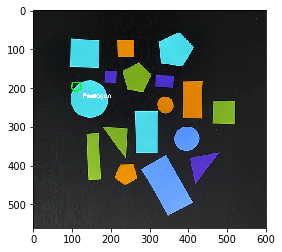

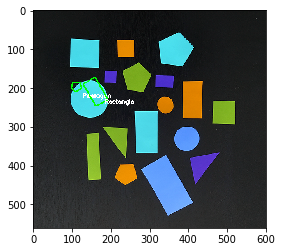

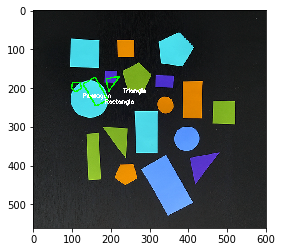

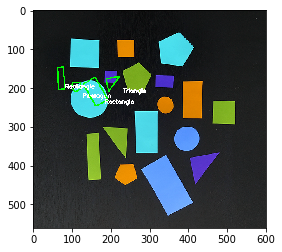

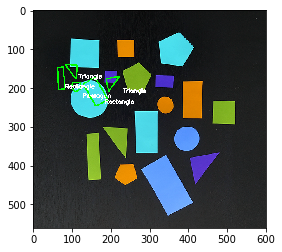

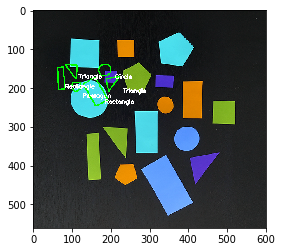

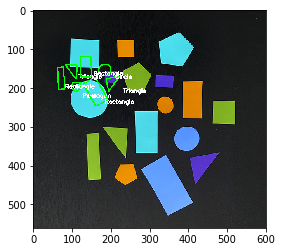

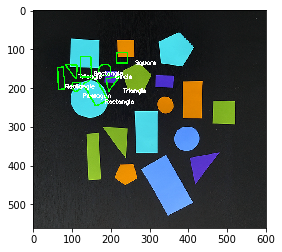

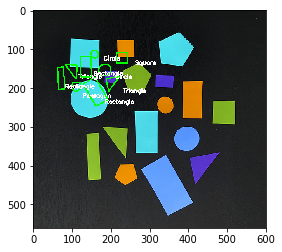

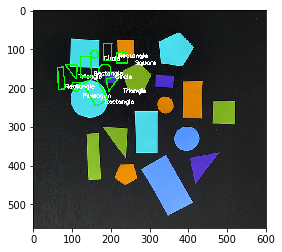

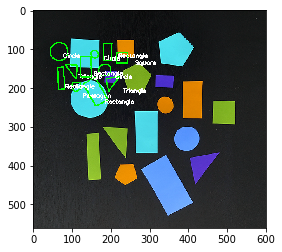

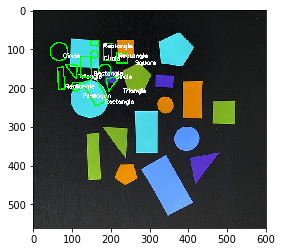

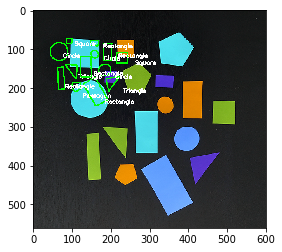

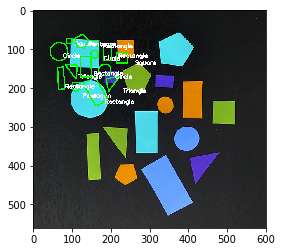

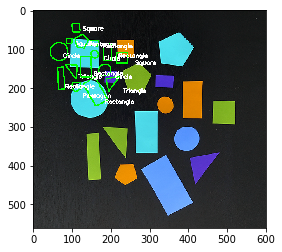

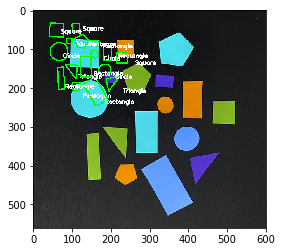

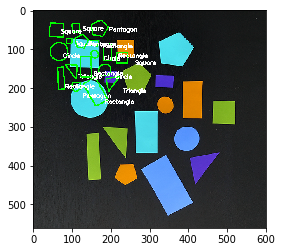

In [51]:
for c in cnts:
    M = cv2.moments(c)
    cX = int(M["m10"] / (M["m00"] * ratio + 1e-4))
    cY = int(M["m01"] / (M["m00"] * ratio + 1e-4))
    shape = sd.detect(c)
    
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    plt.imshow(image)
    plt.show()
    